In [35]:
%matplotlib inline

from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import randint as sp_randint
from seaborn import pairplot

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import shuffle

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

import mglearn

from sklearn.datasets import load_iris
import random
random.seed(15)
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import seaborn as sns

from collections import Counter

from imblearn.over_sampling import RandomOverSampler

from sklearn.ensemble import RandomForestClassifier

In [28]:
# admissions over last year for patients with AMI

# severity score - generic physiologic severity of illness score based on lab tests and vital signs
# comorbidity score - severity score based on patients' pre-existing diagnoses
# readmit30 - indicator for hospital readmission within 30 day

df = pd.read_csv('Final Project Data_Case.csv').dropna()
df.tail()

,age,female,flu_season,ed_admit,severity score,comorbidity score,readmit30
4377,88,1,0,1,34,94,0
4378,98,0,0,1,51,136,0
4379,84,1,0,1,10,32,0
4380,67,1,1,1,10,73,0
4381,79,1,0,1,20,92,0


In [29]:
X = df.ix[:,:6]
y = df['readmit30']

# up-sample: resample the minority class to deal with class imbalance

# !pip install -U imbalanced-learn
# from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_sample(X, y)

print(X_resampled.shape)

# default 75-25 train test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, random_state=0)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

(6768, 6)
X_train shape: (5076, 6)
y_train shape: (5076,)
X_test shape: (1692, 6)
y_test shape: (1692,)


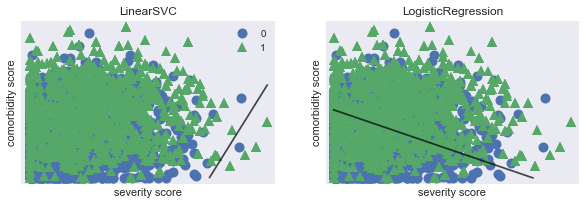

In [30]:
# train classifiers using severity score comorbidity score

# X = np.array(X_train[['severity score', 'comorbidity score']])
X = np.array(X_train[:,4:6])
y = np.array(y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    
    # visualize decision boundary found by linear model
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("severity score")
    ax.set_ylabel("comorbidity score")
axes[0].legend()

# Decision boundaries of a linear SVM and logistic regression on the dataset with the default parameters

In [57]:
# now use all the features

clf = SVC() # use default values for C and gamma
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Returns the mean accuracy on the given test data and labels.

print("Training set score: {:.2f}".format(clf.score(X_train, y_train)))
print("Test set score: {:.2f}".format(clf.score(X_test, y_test)))

Training set score: 0.98
Test set score: 0.90


In [58]:
# now use all the features

clf = RandomForestClassifier() # use default values for C and gamma
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Returns the mean accuracy on the given test data and labels.

print("Training set score: {:.2f}".format(clf.score(X_train, y_train)))
print("Test set score: {:.2f}".format(clf.score(X_test, y_test)))

Training set score: 1.00
Test set score: 0.89


In [66]:
from sklearn.linear_model import LogisticRegression

# now use all the features

clf = LogisticRegression() # use default values for C and gamma
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Returns the mean accuracy on the given test data and labels.

print("Training set score: {:.2f}".format(clf.score(X_train, y_train)))
print("Test set score: {:.2f}".format(clf.score(X_test, y_test)))

Training set score: 0.71
Test set score: 0.71
